# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Leilani Guzman

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: west
step 2 - action: suck
step 3 - action: west
step 4 - action: suck
step 5 - action: south
step 6 - action: east
step 7 - action: south
step 8 - action: east
step 9 - action: east
step 10 - action: south
step 11 - action: east
step 12 - action: south
step 13 - action: suck
step 14 - action: suck
step 15 - action: south
step 16 - action: south
step 17 - action: north
step 18 - action: north
step 19 - action: east


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [5]:
room_size = 4
actions = ["north", "east", "west", "south", "suck"]

def simulation_environment(agent, room, verbose, room_size):
    num_steps = 0
    if (verbose):
        print("Room".center(room_size +10, "="))
        print(room)
    
    dirty_spots_left = np.sum(room)
    #start the agent at a random location, in form [row, column]
    agent_location = [np.random.randint(0, room_size), np.random.randint(0, room_size)]
    if (verbose):
        print("Agent starting location:", agent_location)

    #initialize bumpers based on agent starting location
    bumpers = {"north": int(agent_location[0] == 0), "south":int(agent_location[0] == room_size - 1), 
               "west":int(agent_location[1] == 0), "east": int(agent_location[1] == room_size - 1)}
    
    while (dirty_spots_left > 0):
        # the agent only knows if it is on a dirty spot or not, and bumper information to decide an action
        action = agent(bumpers, room[agent_location[0], agent_location[1]])

        if (verbose):
            print("step", num_steps + 1, "- action:", action)
        if (action == "suck"  and room[agent_location[0], agent_location[1]] == 1):
            dirty_spots_left = dirty_spots_left - 1
            room[agent_location[0], agent_location[1]] = 0 #clean the spot
        
        #update agent location, rechecking bumpers since the dumb agent ignores the walls
        if (action == "north" and bumpers["north"] == False):
            agent_location[0] = agent_location[0] - 1 #go up one row
        elif (action == "south" and bumpers["south"] == False):
            agent_location[0] = agent_location[0] + 1 #go down one row
        elif (action == "east" and bumpers["east"] == False):
            agent_location[1] = agent_location[1] + 1 #go right one column
        elif (action == "west" and bumpers["west"] == False):   
            agent_location[1] = agent_location[1] - 1 #go left one column
        
        num_steps = num_steps + 1

        #update bumpers
        if (agent_location[1] == 0):
            bumpers["west"] = True          #0 x coordinate is the leftmost column/wall
        else:
            bumpers["west"] = False
        if (agent_location[1] == room_size - 1):
            bumpers["east"] = True          #room_size - 1 x coordinate is the rightmost column/wall
        else:
            bumpers["east"] = False
        if (agent_location[0] == 0):
            bumpers["north"] = True         # 0 y coordinate is the top row/wall
        else:   
            bumpers["north"] = False
        if (agent_location[0] == room_size - 1):
            bumpers["south"] = True         # room_size - 1 y coordinate is the bottom row/wall
        else:
            bumpers["south"] = False
        
    
    return num_steps

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [6]:
def simple_reflex_agent(bumpers, dirty):
    if (dirty):
        return "suck"
    else:
        #basic reflexes, go different direction away from the wall
        #return a random action where there is not a wall (not suck)
        return np.random.choice([action for action in actions if action != "suck" and not bumpers[action]])


room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8]) #1 means dirty, 0 means clean
print('\nTotal steps: ' , simulation_environment(simple_reflex_agent, room_1, True, room_size))


=====Room=====
[[1 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]
Agent starting location: [2, 0]
step 1 - action: north
step 2 - action: east
step 3 - action: east
step 4 - action: suck
step 5 - action: east
step 6 - action: north
step 7 - action: south
step 8 - action: north
step 9 - action: south
step 10 - action: south
step 11 - action: south
step 12 - action: west
step 13 - action: suck
step 14 - action: east
step 15 - action: north
step 16 - action: south
step 17 - action: north
step 18 - action: west
step 19 - action: suck
step 20 - action: east
step 21 - action: south
step 22 - action: north
step 23 - action: south
step 24 - action: north
step 25 - action: west
step 26 - action: east
step 27 - action: north
step 28 - action: west
step 29 - action: east
step 30 - action: south
step 31 - action: west
step 32 - action: west
step 33 - action: north
step 34 - action: east
step 35 - action: south
step 36 - action: east
step 37 - action: south
step 38 - action: west
step 39 - action: north


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

### Short description of the state and implementation

The agent states consist of the following:
* The current location of the agent
* Previous locations that the agent has visited
* Spots adjacent to spots visited that have not been visited yet

These states are represented as class variables in the model_based_reflex_agent class. This is done so that the state information can be preserved in between calls to the agent, or also known as its "memory". 

The agent starts at a random location in the room, the same as the previous agent did; However, with this agent it needs to know its location in the room. To determine its location, first it moves to the top left corner of the room, while cleaning dirty spots along the way. Once it reaches the top left corner, it begins moving in a snake like pattern throughout the room while cleaning dirty spots. Moving in this manner ensures that the agent is not revisiting spots (aside from the ones it passed through to get to the corner). The reason it moves like this is because at each spot it chooses, it expands its list of not visited spots to include all adjacent spots that have not been visited yet. Based on the order of possible directions it checks (north, south, west, east), the east direction is always added last to the list meaning it is the first direction it will move to next if it can. This results in the snake like behavior, where it moves eastward first, and then south, and then west, and so on. 

See implementation below:


In [7]:
#make a class for this agent to keep certain attributes across agent calls from the environment
class model_based_reflex_agent:
    def __init__(self):
        #need to use class variables to keep track of variables between each call from the environment
        self.current_position = (-1,-1) #start as random coordinate
        self.visited = []
        self.not_visited = []
    
    
    def reset(self):
        self.current_position = (-1,-1) 
        self.visited = []
        self.not_visited = []

    def search(self, bumpers, dirty):
        # DFS approach to clean the room
        actions = {"north": [-1,0], "south" : [1,0], "west" : [0,-1], "east": [0,1]} #north, south, west, east

        # start moving towards top left corner, once it hits the corner update the current position and begin cleaning routine
        if (self.current_position == (-1,-1)):
            if(dirty):
                return "suck" #might as well clean a little on the way to the corner
            if(bumpers["north"] == False):
                return "north"
            elif(bumpers["west"] == False):
                return "west"
            #elif both north and west bumpers are false then it is in the top left corner and can update its current position
            elif(bumpers["north"] == True and bumpers["west"] == True):
                self.current_position = (0,0)
                return

        if(self.current_position not in self.visited):
            self.visited.append(self.current_position) #add current position to visited list

        #remove current position from not_visited if it's there, without the if the remove option would throw an error
        if (self.current_position in self.not_visited):
            self.not_visited.remove(self.current_position)
        
        
        #if not dirty then add adjacent spots to not_visited
        for potential_spot in actions:
            #add the current position coordinate to the action coordinate to get the new spot
            new_spot = [self.current_position[x] + actions[potential_spot][x] for x in range(len(self.current_position))]

            if (bumpers[potential_spot] == False and new_spot not in self.visited and new_spot[0] >= 0 and new_spot[0] < room_size and new_spot[1] >= 0 and new_spot[1] < room_size):
                # print("new spots", new_spot)
                self.not_visited.append(new_spot)

        if dirty:
            return "suck"
        
        old_spot = self.current_position

        #make current position the last element of not_visited
        self.current_position = self.not_visited[-1]

        #return the direction to move (north, south, east, west)
        if (self.current_position[0] > old_spot[0]):
            return "south"
        elif (self.current_position[0] < old_spot[0]):
            return "north"
        elif (self.current_position[1] > old_spot[1]):
            return "east"
        elif (self.current_position[1] < old_spot[1]):
            return "west"


room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8]) #1 means dirty, 0 means clean
smart_agent = model_based_reflex_agent()
smart_agent.reset()  #here during testing when this block of code is repeatedly run
print('\nTotal steps: ' , simulation_environment(smart_agent.search, room_1, True, room_size))
smart_agent.reset()

=====Room=====
[[0 0 0 1]
 [0 1 0 0]
 [1 1 0 0]
 [1 0 0 0]]
Agent starting location: [3, 0]
step 1 - action: suck
step 2 - action: north
step 3 - action: suck
step 4 - action: north
step 5 - action: north
step 6 - action: None
step 7 - action: east
step 8 - action: east
step 9 - action: east
step 10 - action: suck
step 11 - action: south
step 12 - action: west
step 13 - action: west
step 14 - action: suck
step 15 - action: west
step 16 - action: south
step 17 - action: east
step 18 - action: suck

Total steps:  18


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [8]:
randomized_agent_steps_5 = []
reflex_agent_steps_5 = []
model_agent_steps_5 = []
randomized_agent_steps_10 = []
reflex_agent_steps_10 = []
model_agent_steps_10 = []
randomized_agent_steps_100 = []
reflex_agent_steps_100 = []
model_agent_steps_100 = []

#5x5 room
room_size = 5
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_5.append(simulation_environment(simple_randomized_agent, room_1, False, room_size))
    reflex_agent_steps_5.append(simulation_environment(simple_reflex_agent, room_2, False, room_size))
    model_agent_steps_5.append(simulation_environment(smart_agent.search, room_3, False, room_size))
    smart_agent.reset() #reset the agent for the next trial

#10x10 room
room_size = 10
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_10.append(simulation_environment(simple_randomized_agent, room_1, False, room_size))
    reflex_agent_steps_10.append(simulation_environment(simple_reflex_agent, room_2, False, room_size))
    model_agent_steps_10.append(simulation_environment(smart_agent.search, room_3, False, room_size))
    smart_agent.reset()

#100x100 room
room_size = 100
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_100.append(simulation_environment(simple_randomized_agent, room_1, False, room_size))
    reflex_agent_steps_100.append(simulation_environment(simple_reflex_agent, room_2, False, room_size))
    model_agent_steps_100.append(simulation_environment(smart_agent.search, room_3, False, room_size))
    smart_agent.reset()  

In [9]:
import pandas as pd

#make a table of the results, with columns for each agent, and rows for each room size

table = pd.DataFrame(columns = ["Randomized Agent", "Reflex Agent", "Model Based Agent"], index = ["5x5", "10x10", "100x100"])
table["Randomized Agent"] = [np.mean(randomized_agent_steps_5), np.mean(randomized_agent_steps_10), np.mean(randomized_agent_steps_100)]
table["Reflex Agent"] = [np.mean(reflex_agent_steps_5), np.mean(reflex_agent_steps_10), np.mean(reflex_agent_steps_100)]
table["Model Based Agent"] = [np.mean(model_agent_steps_5), np.mean(model_agent_steps_10), np.mean(model_agent_steps_100)]
table

,Randomized Agent,Reflex Agent,Model Based Agent
5x5,405.82,110.25,29.31
10x10,2792.49,904.64,123.99
100x100,858467.91,341885.90,12096.27


As seen from the above table, the average number of steps is lowest for the model based agent for each room. The average number of steps increases as it goes from model to reflex to randomized agent, and it increases in general for every agent as the room size increases.

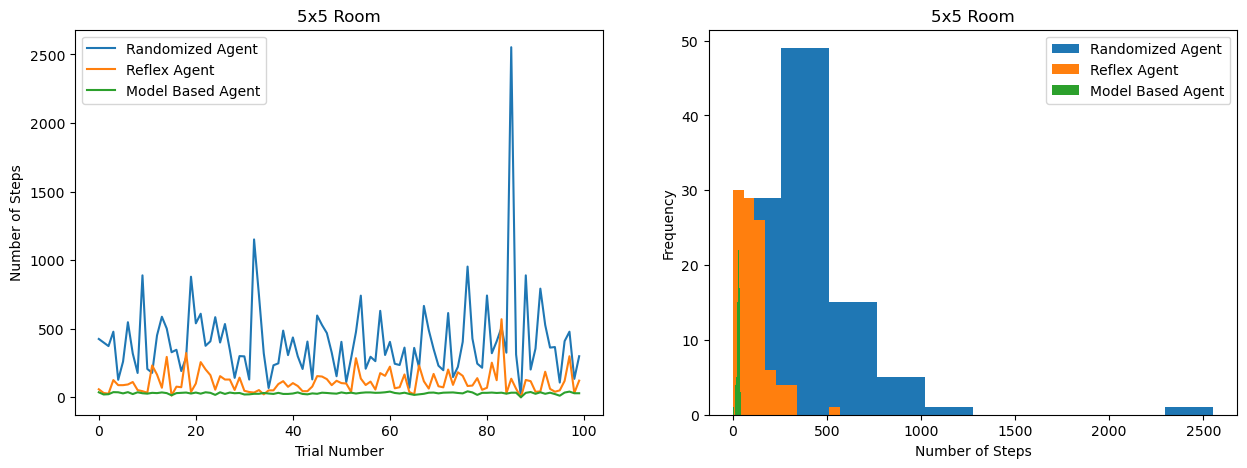

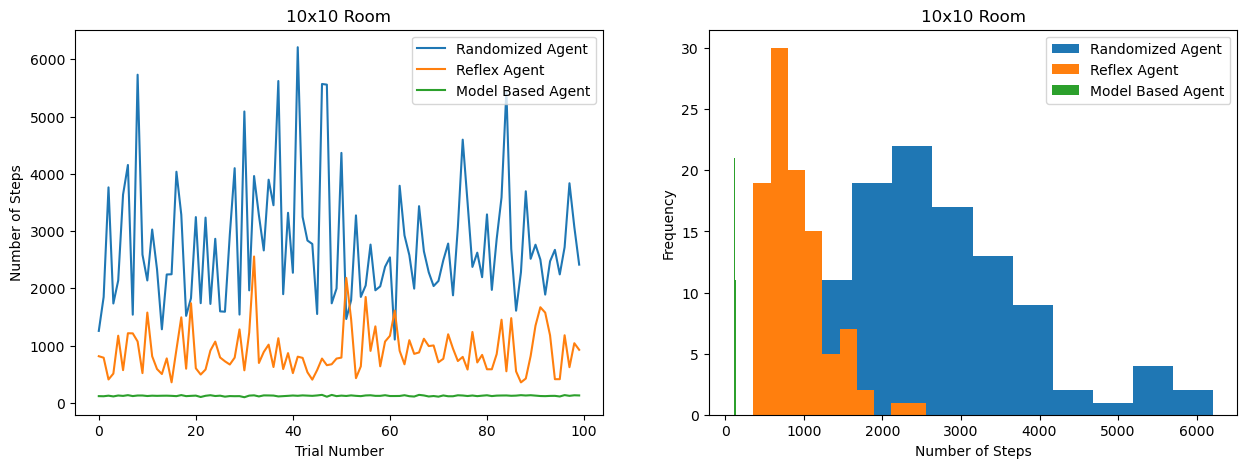

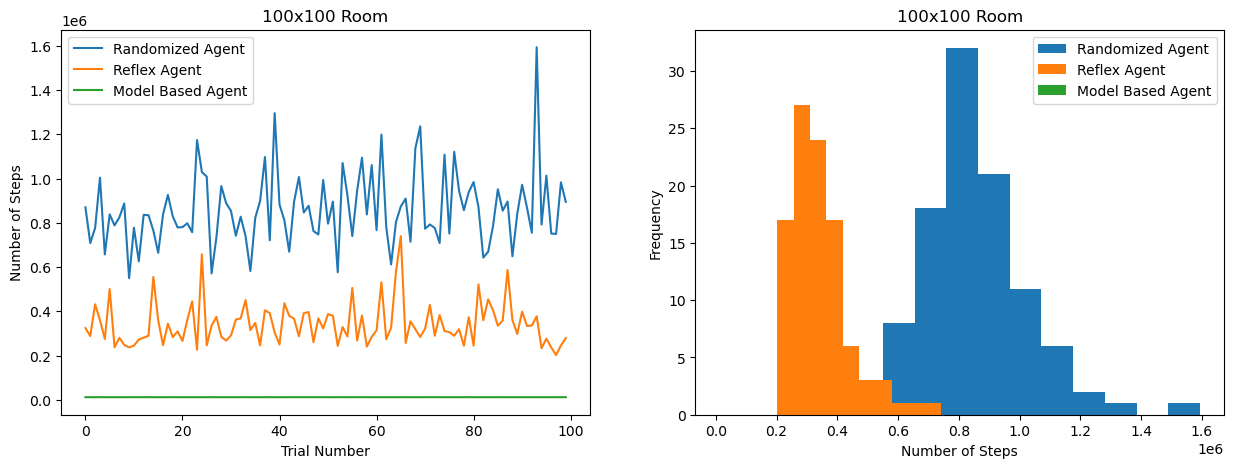

In [10]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

# 5x5 room
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("5x5 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_5, label = "Randomized Agent")
plt.plot(reflex_agent_steps_5, label = "Reflex Agent")
plt.plot(model_agent_steps_5, label = "Model Based Agent")
plt.legend()

plt.subplot(1,2,2)
plt.title("5x5 Room")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.hist(randomized_agent_steps_5, label = "Randomized Agent")
plt.hist(reflex_agent_steps_5, label = "Reflex Agent")
plt.hist(model_agent_steps_5, label = "Model Based Agent")
plt.legend()
plt.show()

# 10x10 room
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("10x10 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_10, label = "Randomized Agent")
plt.plot(reflex_agent_steps_10, label = "Reflex Agent")
plt.plot(model_agent_steps_10, label = "Model Based Agent")
plt.legend()

plt.subplot(1,2,2)
plt.title("10x10 Room")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.hist(randomized_agent_steps_10, label = "Randomized Agent")
plt.hist(reflex_agent_steps_10, label = "Reflex Agent")
plt.hist(model_agent_steps_10, label = "Model Based Agent")
plt.legend()
plt.show()

# 100x100 room
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("100x100 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_100, label = "Randomized Agent")
plt.plot(reflex_agent_steps_100, label = "Reflex Agent")
plt.plot(model_agent_steps_100, label = "Model Based Agent")
plt.legend()

plt.subplot(1,2,2)
plt.title("100x100 Room")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.hist(randomized_agent_steps_100, label = "Randomized Agent")
plt.hist(reflex_agent_steps_100, label = "Reflex Agent")
plt.hist(model_agent_steps_100, label = "Model Based Agent")
plt.legend()
plt.show()

As seen from the above graphs, in each different size room, the randomized agent always performed worse than the other two agent types, and as the room size increased the number of steps increased drastically. The reflex agent was better than the randomized agent in all rooms but still worse than the model based, and as the room size increased the number of steps also drastically increased but not as much as it did for the rnadomized agent. Overall the model based agent performed the best in all room sizes, and as the room size increased the number of steps only increased slightly. This behavior is expected, since the model based agent not only takes walls into account, but also keeps track of where it has been before, to avoid redundant/repetitive actions that decrease performance. It is also worth noting that the number of steps is relatively constant for each trial, since the model based agent takes the same approach each time it cleans the room, which in the end looks like a snaking pattern throughout the room. The randomized agent was expected to perform the worst, since it does not take into account any external information, and simply just picks a random action, which can result in loops or repetitive moves. The reflex agent was expected to perform somewhere in the middle, since it does take into account the walls, but does not "remember" where it has been as the model based agent does.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

### 1.1 How will the simple_reflex_agent perform in a rectangular room?
The overall performance of this reflex agent will depend on the exact dimensions of this rectangular room and the general distribution of the dirty spots. If the room is very large it will take a lot longer to clean, and if the distribtion is sparse it may take longer for the agent to find the dirty spots since it has no logical navigation abilities. 

### 1.2 How will the model_based_reflex_agent perform in a rectangular room?
The performance of the model_based_reflex agent will be roughly the same if the room were rectangular, since it will still be able to navigate the room in a snaking pattern and avoid walls. The only difference is that it may take longer to clean the room if the dimensions are larger than the square room. 

### 2.1 How will the simple_reflex_agent perform in a room with an irregular shape?
In the case of an irregular shaped room, such as a hallway, the simple_reflex_agent will perform worse than in a square room. If there are small crevices or hallways then it risks the agent getting stuck in a loop alternating directions, since all it does is avoid walls and choose a random direction that is not a wall. This would delay the time it takes to find all the dirty spots, which would lower the overall performance of the agent.

### 2.2 How will the model_based_reflex_agent perform in a room with an irregular shape?
The model_based_reflex_agent will perform better than the simple_reflex_agent in an irregular shaped room, but worse than in a square room. This agent is still able to remember where its been and avoid walls, but irregular shapes such as crevices or hallways make take longer to navigate through, since it will have to fully explore a crevice/hallway before moving on to another area. Depending on this irregular shape, it may also get stuck in a loop, but this is less likely than with the simple_reflex_agent since it has a more logical approach to navigating the room. Perhaps further functionality could be added in the future to allow it to cross through spots that it has been before in order to reach unexplored areas, but this is not implemented in this agent. Additionally, with this current implementation, navigating to a corner would not work to determine the agent's location, since there might not be any traditional corners at all.

### 3.1 How will the simple_reflex_agent perform in a room with obstacles?
In the presence of obstacles, the reflex agent will still perform worse than usual, since it will have to avoid obstacles and will take longer to navigate around them. Since its actions are still random, aside from avoiding walls/obstacles, it may repeatedly bump into the same wall (as seen before) or now into an obstacle. These increased number of blockers for the agent will only slow it down, since it doesn't "remember" where any of these blockers were. This idea will be explored and observed below in the next task. 

### 3.2 How will the model_based_reflex_agent perform in a room with obstacles?
In the presence of obstacles, the model_based_reflex_agent will perform slightly worse than usual, but better than the simple_reflex_agent. The only difference from before is that now instead of only avoiding walls, it will now have to avoid random obstacles throughout the room. This will slow the agent down slightly since there is more navigating it needs to do, but it will simply choose a different direction that hasn't been visited to get around the obstacle. This idea will be explored and observed below in the next task.


## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [32]:
# make new environment that will include obstacles that trigger the bumpers
# same as previous environment, except the bumpers will be set to true if there is an obstacle (-1) or a regular wall

def new_simulation_environment(agent, room, verbose, room_size):
    num_steps = 0
    if (verbose):
        print("Room".center(room_size +10, "="))
        print(room)
    
    dirty_spots_left = np.sum(room == 1)
    agent_location = [np.random.randint(0, room_size), np.random.randint(0, room_size)]
    if (verbose):
        print("Agent starting location:", agent_location)

    #initialize bumpers based on agent starting location
    bumpers = {"north": int(agent_location[0] == 0), "south":int(agent_location[0] == room_size - 1), 
               "west":int(agent_location[1] == 0), "east": int(agent_location[1] == room_size - 1)}
    
    #obstacles are now represented by -1
    while (dirty_spots_left > 0):
        # the agent only knows if it is on a dirty spot or not and has bumper information to decide an action
        action = agent(bumpers, room[agent_location[0], agent_location[1]])

        if (verbose):
            print("step", num_steps , "- action:", action)
        if (action == "suck" and room[agent_location[0], agent_location[1]] == 1):
            # only suck if the spot is dirty, otherwise the dumb agent thinks it dirty and cleans anyway
            dirty_spots_left = dirty_spots_left - 1
            room[agent_location[0], agent_location[1]] = 0 #clean the spot
        
        #update agent location, rechecking bumpers since the dumb agent ignores the walls
        if (action == "north" and bumpers["north"] == False):
            agent_location[0] = agent_location[0] - 1 #go up one row
        elif (action == "south" and bumpers["south"] == False):
            agent_location[0] = agent_location[0] + 1 #go down one row
        elif (action == "east" and bumpers["east"] == False):
            agent_location[1] = agent_location[1] + 1 #go right one column
        elif (action == "west" and bumpers["west"] == False):   
            agent_location[1] = agent_location[1] - 1 #go left one column
        
        num_steps = num_steps + 1

        #update bumpers, also set bumper true if it detects an obstacle (-1)
        if (agent_location[1] == 0 or room[agent_location[0], agent_location[1] - 1] == -1):
            bumpers["west"] = True       #if there is a wall or obstacle to the left
        else:
            bumpers["west"] = False
        if (agent_location[1] == room_size - 1 or room[agent_location[0], agent_location[1] + 1] == -1):
            bumpers["east"] = True       #if there is a wall or obstacle to the right
        else:
            bumpers["east"] = False
        if (agent_location[0] == 0 or room[agent_location[0] - 1, agent_location[1]] == -1):
            bumpers["north"] = True      #if there is a wall or obstacle above
        else:   
            bumpers["north"] = False
        if (agent_location[0] == room_size - 1 or room[agent_location[0] + 1, agent_location[1]] == -1):
            bumpers["south"] = True      #if there is a wall or obstacle below
        else:
            bumpers["south"] = False
        
    
    return num_steps


In [41]:
room_size = 4 #set a room size for basic testing

#make a random room where 1 is dirty, 0 is clean, -1 is an obstacle
room_1 = np.random.choice([1, 0, -1], size=(room_size, room_size), p=[0.2, 0.7, 0.1])
room_1[0,0] = np.random.choice([1, 0], p=[0.2, 0.8]) #make sure starting spot is not an obstacle
room_2 = room_1.copy()
room_3 = room_1.copy()


print("\nTesting simple_randomized_agent with obstacles")
print(room_1)
print('Total steps: ' , new_simulation_environment(simple_randomized_agent, room_1, False, room_size))

print("\nTesting simple_reflex_agent with obstacles")
print(room_2)
print('Total steps: ' , new_simulation_environment(simple_reflex_agent, room_2, False, room_size))

print("\nTesting model_based_reflex_agent with obstacles")
print(room_3)
smart_agent.reset()
print('Total steps: ' , new_simulation_environment(smart_agent.search, room_3, False, room_size))
smart_agent.reset()


Testing simple_randomized_agent with obstacles
[[ 0  0  0  0]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [ 0 -1  0  0]]
Total steps:  171

Testing simple_reflex_agent with obstacles
[[ 0  0  0  0]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [ 0 -1  0  0]]
Total steps:  20

Testing model_based_reflex_agent with obstacles
[[ 0  0  0  0]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [ 0 -1  0  0]]
Total steps:  18


In [42]:
#Observing the performance of each agent when obstacles are present. Using smaller number of trials than before
randomized_agent_steps_5 = []
reflex_agent_steps_5 = []
model_agent_steps_5 = []
randomized_agent_steps_10 = []
reflex_agent_steps_10 = []
model_agent_steps_10 = []
randomized_agent_steps_100 = []
reflex_agent_steps_100 = []
model_agent_steps_100 = []

smart_agent.reset()

#5x5 room
room_size = 5
for trial in range (20):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_5.append(new_simulation_environment(simple_randomized_agent, room_1, False, room_size))
    reflex_agent_steps_5.append(new_simulation_environment(simple_reflex_agent, room_2, False, room_size))
    model_agent_steps_5.append(new_simulation_environment(smart_agent.search, room_3, False, room_size))
    smart_agent.reset() #reset the agent for the next trial

#10x10 room
room_size = 10
for trial in range (20):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_10.append(new_simulation_environment(simple_randomized_agent, room_1, False, room_size))
    reflex_agent_steps_10.append(new_simulation_environment(simple_reflex_agent, room_2, False, room_size))
    model_agent_steps_10.append(new_simulation_environment(smart_agent.search, room_3, False, room_size))
    smart_agent.reset()

#100x100 room
room_size = 100
for trial in range (20):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_100.append(new_simulation_environment(simple_randomized_agent, room_1, False, room_size))
    reflex_agent_steps_100.append(new_simulation_environment(simple_reflex_agent, room_2, False, room_size))
    model_agent_steps_100.append(new_simulation_environment(smart_agent.search, room_3, False, room_size))
    smart_agent.reset()  

In [43]:
#make a table of the results, with columns for each agent, and rows for each room size

table = pd.DataFrame(columns = ["Randomized Agent", "Reflex Agent", "Model Based Agent"], index = ["5x5", "10x10", "100x100"])
table["Randomized Agent"] = [np.mean(randomized_agent_steps_5), np.mean(randomized_agent_steps_10), np.mean(randomized_agent_steps_100)]
table["Reflex Agent"] = [np.mean(reflex_agent_steps_5), np.mean(reflex_agent_steps_10), np.mean(reflex_agent_steps_100)]
table["Model Based Agent"] = [np.mean(model_agent_steps_5), np.mean(model_agent_steps_10), np.mean(model_agent_steps_100)]
table

,Randomized Agent,Reflex Agent,Model Based Agent
5x5,512.25,124.55,30.85
10x10,3181.35,831.60,124.70
100x100,827262.30,313981.65,12080.85


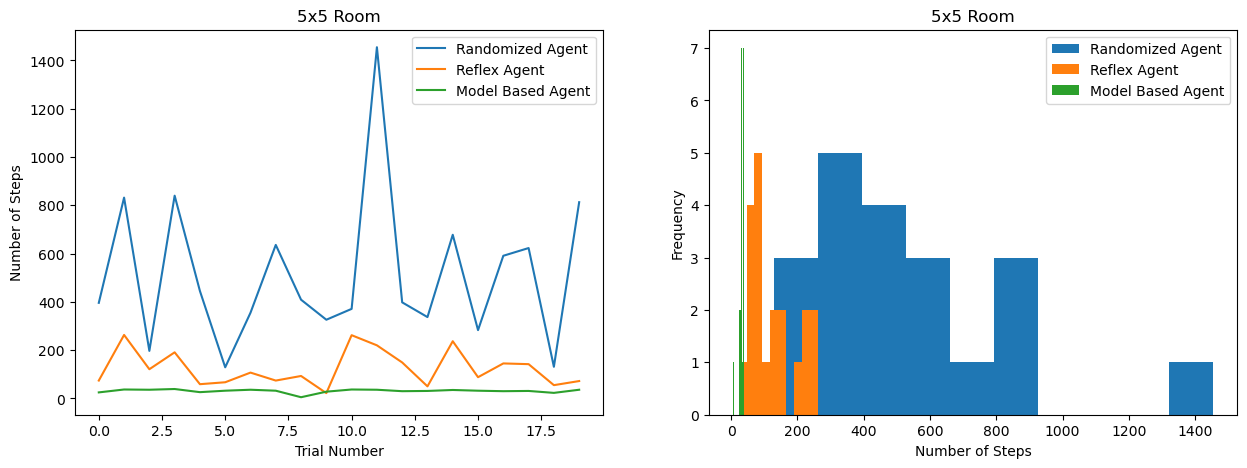

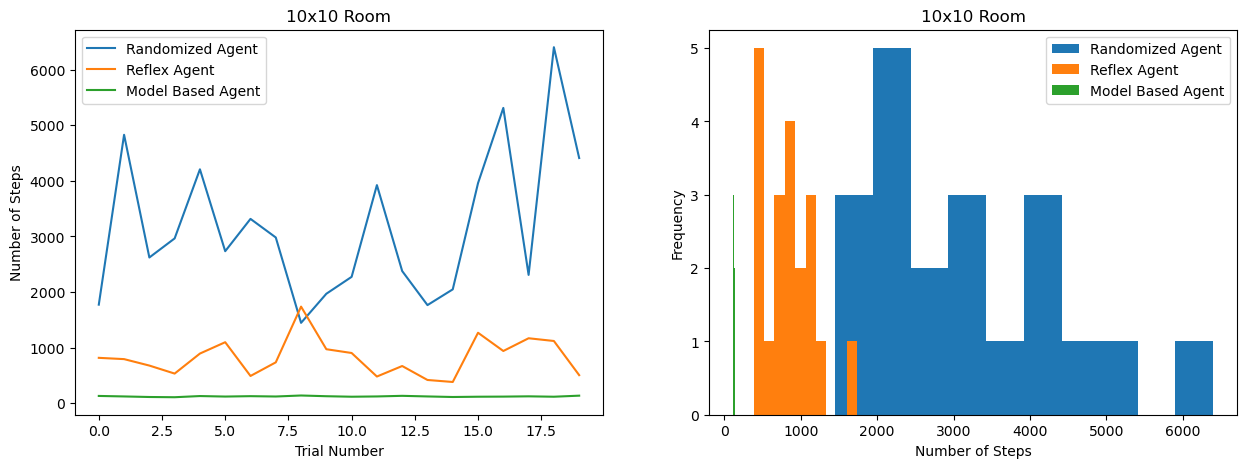

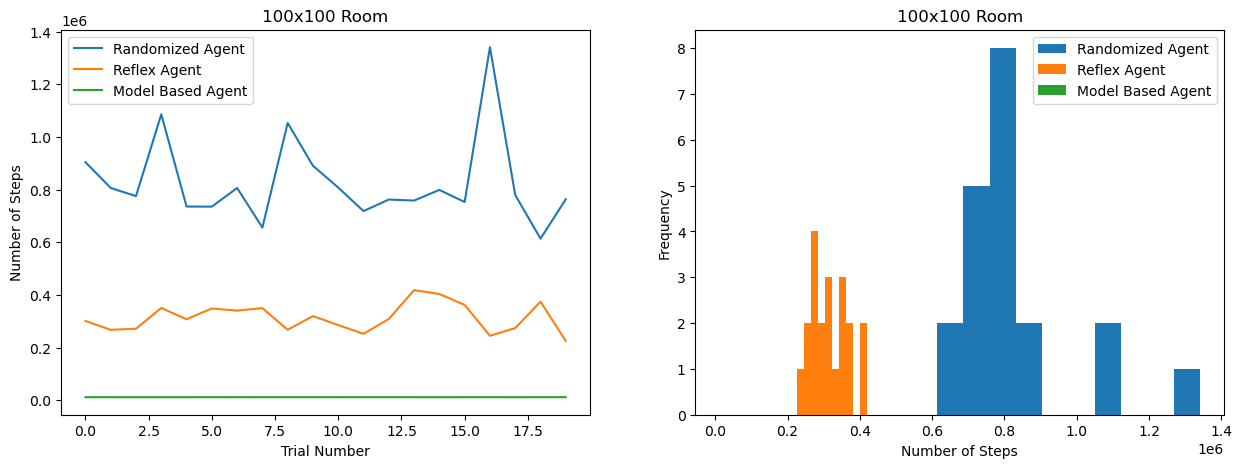

In [44]:
# 5x5 room
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("5x5 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_5, label = "Randomized Agent")
plt.plot(reflex_agent_steps_5, label = "Reflex Agent")
plt.plot(model_agent_steps_5, label = "Model Based Agent")
plt.legend()

plt.subplot(1,2,2)
plt.title("5x5 Room")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.hist(randomized_agent_steps_5, label = "Randomized Agent")
plt.hist(reflex_agent_steps_5, label = "Reflex Agent")
plt.hist(model_agent_steps_5, label = "Model Based Agent")
plt.legend()
plt.show()

# 10x10 room
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("10x10 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_10, label = "Randomized Agent")
plt.plot(reflex_agent_steps_10, label = "Reflex Agent")
plt.plot(model_agent_steps_10, label = "Model Based Agent")
plt.legend()

plt.subplot(1,2,2)
plt.title("10x10 Room")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.hist(randomized_agent_steps_10, label = "Randomized Agent")
plt.hist(reflex_agent_steps_10, label = "Reflex Agent")
plt.hist(model_agent_steps_10, label = "Model Based Agent")
plt.legend()
plt.show()

# 100x100 room
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("100x100 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_100, label = "Randomized Agent")
plt.plot(reflex_agent_steps_100, label = "Reflex Agent")
plt.plot(model_agent_steps_100, label = "Model Based Agent")
plt.legend()

plt.subplot(1,2,2)
plt.title("100x100 Room")
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.hist(randomized_agent_steps_100, label = "Randomized Agent")
plt.hist(reflex_agent_steps_100, label = "Reflex Agent")
plt.hist(model_agent_steps_100, label = "Model Based Agent")
plt.legend()
plt.show()

Although the above graphs were run with a lower number of trials, the same trend as before is still apparent. The model based agent performs the best, followed by the reflex agent, and then the randomized agent. The model based agent performs the best since it takes into account the walls and obstacles, and it also "remembers" where it has been before, so it does not repeat actions. As seen above the number of steps over each trial is more constant and way lower than the other agents, which is especially more visible as the room size increases. This fact is even more apparent when looking at the histogram of steps for the 100x100 room, in which in comparison to the other two agents, the model_based_reflex_agent has much lower step counts that it's not visible on the graph due to the size of the others. The reflex agent performs better than the randomized agent since it also takes into account the walls and obstacles, but it does not "remember" where it has been before, so it may repeat actions. The randomized agent performs the worst since it does not take into account any external information, and simply just picks a random action, which can result in loops or repetitive moves. This is seen on the graphs where the line for the randomized agent is much higher than the others, and in the histogram where there are many more trials with higher step counts in all room sizes.

In order to perform better in the presence of obstacles, it would be beneficial if the agent (assuming model agent) had more knowledge of the layout of the room itself. If this is an option for the agent, then it could use a path planning algorithm to find a route that avoids obstacles and cleans the room in the most efficient way possible. Another alternative could be to add functionality where if needed the agent could cross over spots that it has visited before in order to reach unexplored areas. Potential problems could arise if obstacles are generated in such a way that they either block off areas of the room or trap the agent initially. To combat this issue, additional functionality would need to be added to ensure that the distribution of obstacles does not result in these issues, and so that the agent does not spawn in a trapped area.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code